In [31]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

Text(0, 0.5, 'Height')

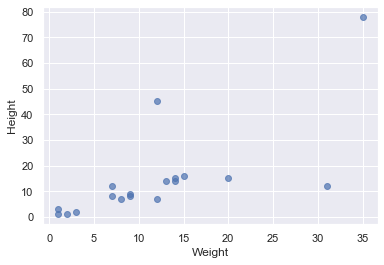

In [32]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15],
    [31, 12], [35, 78], [12, 45],
    [20, 15], [12, 7], [7, 12],
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')

In [33]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)

In [34]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

## Different Graphs and Inferences

### Graph1

[[0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1]
 [1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0]
 [1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0]
 [1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1]
 [0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]
 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0]
 [0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1]
 [1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0]
 [1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0]
 [1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0]
 [0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0]
 [1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0]]


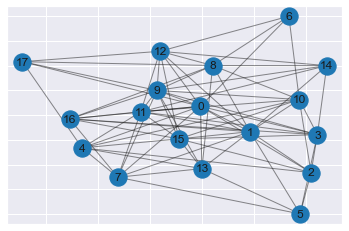

In [35]:
G = nx.random_graphs.erdos_renyi_graph(18, 0.5)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [36]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0

In [37]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-0.000 14.513 3.415 13.416 4.268 4.948 5.671 6.242 12.596 12.368 11.508
 10.859 7.324 8.067 9.764 8.768 9.271 9.001]
eigenvectors:
[[0.236 0.482 0.026 0.645 0.029 0.060 -0.092 -0.065 0.014 -0.027 -0.377
  0.222 0.033 0.126 0.078 0.155 0.181 -0.076]
 [0.236 -0.571 -0.078 0.267 -0.031 -0.081 0.014 -0.041 0.441 -0.397
  -0.258 -0.190 -0.013 -0.110 0.000 0.164 -0.186 -0.050]
 [0.236 -0.014 -0.201 -0.160 -0.165 0.097 -0.291 0.590 -0.156 0.052 0.024
  -0.009 -0.021 -0.026 0.085 0.589 0.015 0.155]
 [0.236 -0.116 -0.123 -0.116 -0.050 -0.168 -0.036 0.211 0.292 -0.125
  0.190 0.426 0.314 0.088 0.287 -0.343 0.448 0.022]
 [0.236 -0.164 -0.077 0.032 0.108 0.195 -0.347 0.026 0.066 0.079 0.081
  0.275 -0.449 0.290 -0.546 -0.243 -0.033 0.059]
 [0.236 0.060 -0.457 0.046 -0.441 0.323 0.563 0.062 -0.095 0.051 -0.013
  -0.020 0.105 0.016 -0.197 -0.171 -0.111 -0.074]
 [0.236 -0.079 0.746 -0.044 -0.538 0.141 0.038 -0.031 -0.029 -0.035 0.048
  -0.109 -0.008 0.157 -0.037 0.007 0.153 0.055]
 [0.2

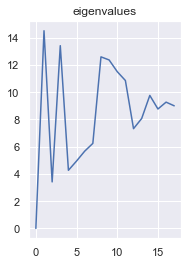

In [38]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
plt.show()

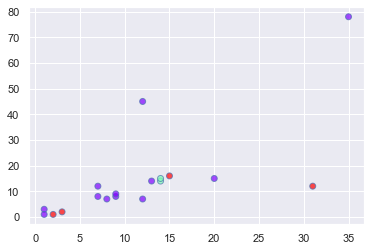

In [40]:
y = v[:,8]
km = KMeans(init='k-means++', n_clusters=2)
#y.shape()
km_clustering = km.fit(y.reshape(-1,1))
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')
#km_clustering.labels_

### Graph2

[[0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


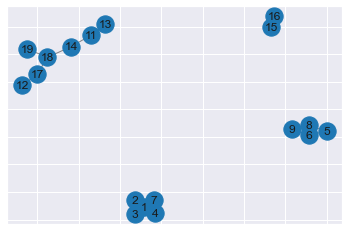

In [62]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 7],
    [3, 4],
    [4, 7],
    [1, 7],
    [6, 5],
    [5, 8],
    [6, 8],
    [9, 8],
    [9, 6],
    [12, 17],
    [14, 11],
    [11, 13],
    [15, 16],
    [17, 18],
    [18, 14],
    [18,19]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [63]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  3 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1 -1  0 -1  3  0  0  0  0  0  0  

In [64]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.000 0.000 3.000 5.000 3.000 4.000 0.000 4.000 2.000 4.334 3.100 2.274
 1.405 -0.000 0.626 0.260 0.000 2.000]
eigenvectors:
[[0.894 -0.447 0.000 0.157 -0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.702 0.453 0.279 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.081 -0.532 -0.650 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.702 0.453 -0.279 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.081 -0.532 0.650 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.866 -0.500 -0.157 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.454 -0.707 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.

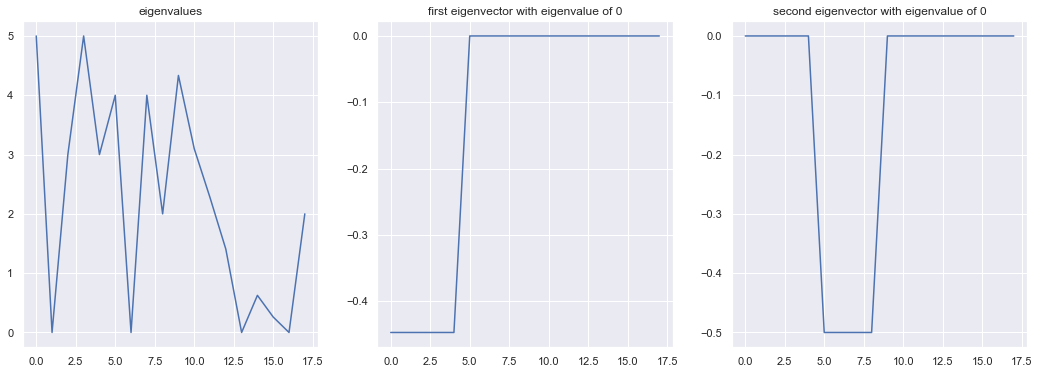

In [65]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax2.title.set_text('first eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue of 0')

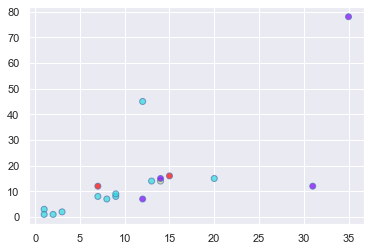

In [72]:
y = v[:,13]
km = KMeans(init='k-means++', n_clusters=4)
#y.shape()
km_clustering = km.fit(y.reshape(-1,1))
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')
#km_clustering.labels_

## Different dataset

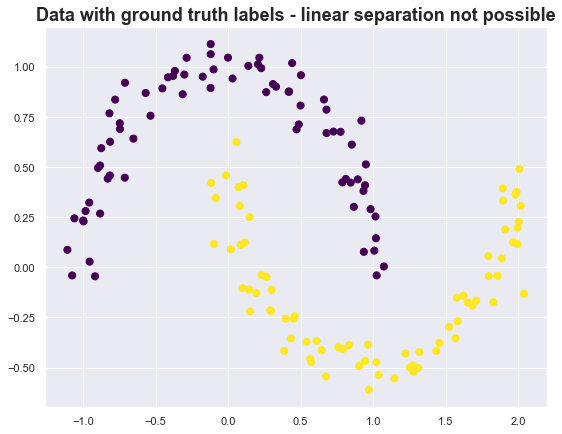

In [73]:
%matplotlib inline
from sklearn.datasets import make_moons
random_state = 21
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

In [74]:
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
A = radius_neighbors_graph(X_mn,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
# A = kneighbors_graph(X_mn, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)
A = A.toarray()

In [75]:
from scipy.sparse import csgraph
L = csgraph.laplacian(A, normed=False)

In [76]:
eigval, eigvec = np.linalg.eig(L)
np.where(eigval == np.partition(eigval, 1)[1])# the second smallest eigenvalue

(array([1], dtype=int64),)

In [77]:
y_spec =eigvec[:,1].copy()
y_spec[y_spec < 0] = 0
y_spec[y_spec > 0] = 1
type(y_spec),y_mn.shape,y_spec.shape

(numpy.ndarray, (150,), (150,))

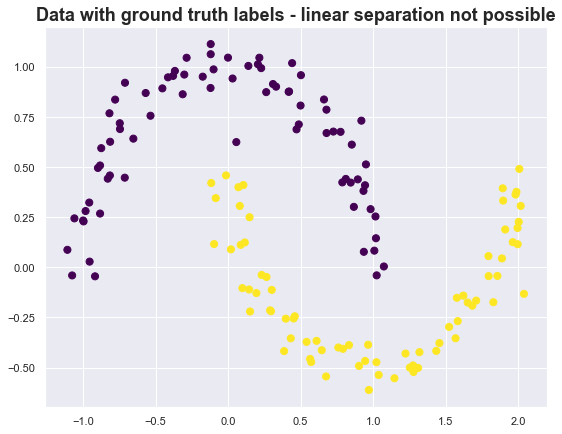

In [78]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_spec ,s=dot_size, cmap=cmap)

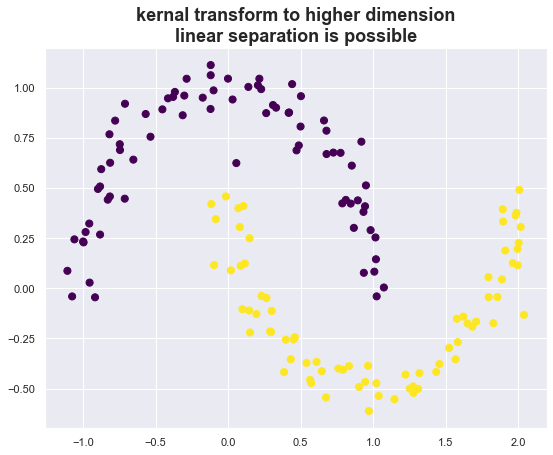

In [79]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labelsS = model.fit_predict(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)